# BETTING ARBITRAGE 101

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

## Imports and set magics:

In [410]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Premier League data for the past 10 seasons including full-time scores and betting odds from B365.

**Read the Premier League data** in ``PL_all_seasons.csv`` and **clean it** removing columns:

In [412]:
# 1.a load data without unnecessary data
raw_input = pd.read_csv('PL_all_seasons.csv', \
usecols=['Date','HomeTeam','AwayTeam','FTR','B365H','B365D','B365A'])

Append seasons to the dataset using datetime

In [414]:
# 1.b convert date from string to datetimes
raw_input['Date'] = pd.to_datetime(raw_input['Date'], dayfirst = True)

# 1.c append seasons
# Add a new column named 'season' 
Type_new = pd.Series([])

# running a for loop and asigning some values to series 
for i in range(len(raw_input)): 
    if raw_input["Date"][i] < datetime(2010, 8, 10): 
        Type_new[i]="09/10"
  
    elif raw_input["Date"][i] < datetime(2011, 8, 10): 
        Type_new[i]="10/11"
  
    elif raw_input["Date"][i] < datetime(2012, 8, 10):  
        Type_new[i]="11/12"
  
    elif raw_input["Date"][i] < datetime(2013, 8, 10):  
        Type_new[i]="12/13"
  
    elif raw_input["Date"][i] < datetime(2014, 8, 10):  
        Type_new[i]="13/14"
    
    elif raw_input["Date"][i] < datetime(2015, 8, 10):  
        Type_new[i]="14/15"
  
    elif raw_input["Date"][i] < datetime(2016, 8, 10):  
        Type_new[i]="15/16"

    elif raw_input["Date"][i] < datetime(2017, 8, 10):  
        Type_new[i]="16/17"
  
    elif raw_input["Date"][i] < datetime(2018, 8, 10):  
        Type_new[i]="17/18"
  
    elif raw_input["Date"][i] < datetime(2019, 8, 10):  
        Type_new[i]="18/19"

    else: 
        season[i]= raw_input["Date"][i] 
  
        
        # inserting new column with values of list made above         
raw_input.insert(2, "Season", Type_new) 
# raw_input.head(10)
#####################################################################################################################

# 1.d Combine total data frame

df = pd.DataFrame(raw_input)


The dataset now looks like this:

In [416]:
df.head(10)

,Date,HomeTeam,Season,AwayTeam,FTR,B365H,B365D,B365A
0,2009-08-15,Aston Villa,09/10,Wigan,A,1.67,3.60,5.50
1,2009-08-15,Blackburn,09/10,Man City,A,3.60,3.25,2.10
2,2009-08-15,Bolton,09/10,Sunderland,A,2.25,3.25,3.25
3,2009-08-15,Chelsea,09/10,Hull,H,1.17,6.50,21.00
4,2009-08-15,Everton,09/10,Arsenal,A,3.20,3.25,2.30
5,2009-08-15,Portsmouth,09/10,Fulham,A,2.63,3.20,2.75
6,2009-08-15,Stoke,09/10,Burnley,H,1.91,3.30,4.33
7,2009-08-15,Wolves,09/10,West Ham,A,2.63,3.30,2.70
8,2009-08-16,Man United,09/10,Birmingham,H,1.20,6.00,17.00
9,2009-08-16,Tottenham,09/10,Liverpool,H,3.20,3.25,2.30


# Data analysis

We are interested in investigating betting strategies where one solely plays Away (A) side win, Draw (D), or Home (H) side win for 1 or all seasons.

Therefore we must find the returns for each match we guess right for each strategy. We do so by making a boolean that flags the result and then multiplying this with the betting odds from B365.

In [ ]:
# 2.a add boolean of result Home, Draw, Away and then print df

df['H_true'] = df['FTR'].str.count("H")
df['D_true'] = df['FTR'].str.count("D")
df['A_true'] = df['FTR'].str.count("A")

# 2.b multiply boolean of Draw (D_true) with B365 odds of draw to get each games return for you

df['Return_H'] = ( df.loc[:, 'H_true'] * df.loc[:, 'B365H'] )
df['Return_D'] = ( df.loc[:, 'D_true'] * df.loc[:, 'B365D'] )
df['Return_A'] = ( df.loc[:, 'A_true'] * df.loc[:, 'B365A'] )

The dataset now looks like this:

In [419]:
df.head(10)

,Date,HomeTeam,Season,AwayTeam,FTR,B365H,B365D,B365A,H_true,D_true,A_true,Return_H,Return_D,Return_A
0,2009-08-15,Aston Villa,09/10,Wigan,A,1.67,3.60,5.50,0,0,1,0.00,0.0,5.50
1,2009-08-15,Blackburn,09/10,Man City,A,3.60,3.25,2.10,0,0,1,0.00,0.0,2.10
2,2009-08-15,Bolton,09/10,Sunderland,A,2.25,3.25,3.25,0,0,1,0.00,0.0,3.25
3,2009-08-15,Chelsea,09/10,Hull,H,1.17,6.50,21.00,1,0,0,1.17,0.0,0.00
4,2009-08-15,Everton,09/10,Arsenal,A,3.20,3.25,2.30,0,0,1,0.00,0.0,2.30
5,2009-08-15,Portsmouth,09/10,Fulham,A,2.63,3.20,2.75,0,0,1,0.00,0.0,2.75
6,2009-08-15,Stoke,09/10,Burnley,H,1.91,3.30,4.33,1,0,0,1.91,0.0,0.00
7,2009-08-15,Wolves,09/10,West Ham,A,2.63,3.30,2.70,0,0,1,0.00,0.0,2.70
8,2009-08-16,Man United,09/10,Birmingham,H,1.20,6.00,17.00,1,0,0,1.20,0.0,0.00
9,2009-08-16,Tottenham,09/10,Liverpool,H,3.20,3.25,2.30,1,0,0,3.20,0.0,0.00


## Is there a 10 year return on betting on either all away teams win (A), all games draw (D), or all home teams win (H)? Let's call these pure betting strategies A, D and H, respectively

In [421]:
# 3.a sum all individual returns to get you full season return for the full-season play A, D, and H

print("Playing strategy A returns "+"{:.2f}".format(df.Return_A.sum())+" DKK")
print("Playing strategy D returns "+"{:.2f}".format(df.Return_D.sum())+" DKK")
print("Playing strategy H returns "+"{:.2f}".format(df.Return_H.sum())+" DKK")

# 3.b find the net return by subtracting the DKK 1 * 3800 games = DKK 3800 you have betted during the 10 season to find your gain/loss and then calculated the return in percentage by dividing the gain with the initial investment. 

print("For strategy A, the net return is "+"{:.2f}".format(df.Return_A.sum() - 3800)+" DKK, which is equivalent to a return of "+"{:.2f}%".format((df.Return_A.sum() / 3800 - 1)*100)+" over a 10 year period")
print("For strategy D, the net return is "+"{:.2f}".format(df.Return_D.sum() - 3800)+" DKK, which is equivalent to a return of "+"{:.2f}%".format((df.Return_D.sum() / 3800 - 1)*100)+" over a 10 year period")
print("For strategy H, the net return is "+"{:.2f}".format(df.Return_H.sum() - 3800)+" DKK, which is equivalent to a return of "+"{:.2f}%".format((df.Return_H.sum() / 3800 - 1)*100)+" over a 10 year period")

# 3.c find the return in percentage by dividing you gain with the DKK 1 * 3800 games = DKK 3800 you have betted during the 10 season and subtract 1.

# print("{:.2f}%".format((df.Return_A.sum() / 3800 - 1)*100))
# print("{:.2f}%".format((df.Return_D.sum() / 3800 - 1)*100))
# print("{:.2f}%".format((df.Return_H.sum() / 3800 - 1)*100))

Playing strategy A returns 3504.25 DKK
Playing strategy D returns 3578.21 DKK
Playing strategy H returns 3804.42 DKK
For strategy A, the net return is -295.75 DKK, which is equivalent to a return of -7.78% over a 10 year period
For strategy D, the net return is -221.79 DKK, which is equivalent to a return of -5.84% over a 10 year period
For strategy H, the net return is 4.42 DKK, which is equivalent to a return of 0.12% over a 10 year period


We find that the pure betting strategy H is the only strategy with a positive return of only 0.1%. 

Let's dig a little bit deeper and see how these strategies performed in each season!

## How do the pure betting strategy returns look for each individual season?

4.a Group by seasons. Keeps booleans and results from H, D and A grouped by season. Why does, Date, AwayTeam, Hometeam disappear? Is it because they are strings?

In [423]:
Season_group = df.groupby(['Season','FTR']).sum()
drop_these = ['B365H','B365D','B365A']
Season_group.drop(drop_these, axis=1, inplace=True)

The dataset now looks like this:

In [425]:
Season_group

H_true  D_true  A_true  Return_H  Return_D  Return_A  BetW    BetR
Season FTR                                                                    
09/10  A         0       0      91      0.00      0.00    260.61    91  260.61
       D         0      96       0      0.00    351.49      0.00    96  351.49
       H       193       0       0    416.02      0.00      0.00   193  416.02
10/11  A         0       0      90      0.00      0.00    328.10    90  328.10
       D         0     111       0      0.00    406.39      0.00   111  406.39
       H       179       0       0    382.78      0.00      0.00   179  382.78
11/12  A         0       0     116      0.00      0.00    395.24   116  395.24
       D         0      93       0      0.00    348.96      0.00    93  348.96
       H       171       0       0    364.77      0.00      0.00   171  364.77
12/13  A         0       0     106      0.00      0.00    333.78   106  333.78
       D         0     108       0      0.00    397.04      0.00   108  397.04
       H       166       0       0    337.36      0.00      0.00   166  337.36
13/14  A         0       0     123      0.00      0.00    389.83   123  389.83
       D         0      78       0      0.00    304.97      0.00    78  304.97
       H       179       0       0    388.39      0.00      0.00   179  388.39
14/15  A         0       0     119      0.00      0.00    402.90   119  402.90
       D         0      96       0      0.00    364.73      0.00    96  364.73
       H       174       0       0    377.28      0.00      0.00   174  377.28
15/16  A         0       0     112      0.00      0.00    390.75   112  390.75
       D         0     104       0      0.00    389.95      0.00   104  389.95
       H       155       0       0    342.73      0.00      0.00   155  342.73
16/17  A         0       0     109      0.00      0.00    307.91   109  307.91
       D         0      84       0      0.00    334.33      0.00    84  334.33
       H       187       0       0    404.93      0.00      0.00   187  404.93
17/18  A         0       0     108      0.00      0.00    322.58   108  322.58
       D         0      99       0      0.00    398.84      0.00    99  398.84
       H       173       0       0    390.98      0.00      0.00   173  390.98
18/19  A         0       0     128      0.00      0.00    372.55   128  372.55
       D         0      71       0      0.00    281.51      0.00    71  281.51
       H       181       0       0    399.18      0.00      0.00   181  399.18

4.b Order the grouped dataframe. Sums the returns and boleans to make 6 rows into 2 rows (for presentation purposes).

In [427]:
Season_group['BetW'] = Season_group.H_true + Season_group.D_true + Season_group.A_true
Season_group['BetR'] = Season_group.Return_H + Season_group.Return_D + Season_group.Return_A

The dataset now looks like this:

In [429]:
Season_group

H_true  D_true  A_true  Return_H  Return_D  Return_A  BetW    BetR
Season FTR                                                                    
09/10  A         0       0      91      0.00      0.00    260.61    91  260.61
       D         0      96       0      0.00    351.49      0.00    96  351.49
       H       193       0       0    416.02      0.00      0.00   193  416.02
10/11  A         0       0      90      0.00      0.00    328.10    90  328.10
       D         0     111       0      0.00    406.39      0.00   111  406.39
       H       179       0       0    382.78      0.00      0.00   179  382.78
11/12  A         0       0     116      0.00      0.00    395.24   116  395.24
       D         0      93       0      0.00    348.96      0.00    93  348.96
       H       171       0       0    364.77      0.00      0.00   171  364.77
12/13  A         0       0     106      0.00      0.00    333.78   106  333.78
       D         0     108       0      0.00    397.04      0.00   108  397.04
       H       166       0       0    337.36      0.00      0.00   166  337.36
13/14  A         0       0     123      0.00      0.00    389.83   123  389.83
       D         0      78       0      0.00    304.97      0.00    78  304.97
       H       179       0       0    388.39      0.00      0.00   179  388.39
14/15  A         0       0     119      0.00      0.00    402.90   119  402.90
       D         0      96       0      0.00    364.73      0.00    96  364.73
       H       174       0       0    377.28      0.00      0.00   174  377.28
15/16  A         0       0     112      0.00      0.00    390.75   112  390.75
       D         0     104       0      0.00    389.95      0.00   104  389.95
       H       155       0       0    342.73      0.00      0.00   155  342.73
16/17  A         0       0     109      0.00      0.00    307.91   109  307.91
       D         0      84       0      0.00    334.33      0.00    84  334.33
       H       187       0       0    404.93      0.00      0.00   187  404.93
17/18  A         0       0     108      0.00      0.00    322.58   108  322.58
       D         0      99       0      0.00    398.84      0.00    99  398.84
       H       173       0       0    390.98      0.00      0.00   173  390.98
18/19  A         0       0     128      0.00      0.00    372.55   128  372.55
       D         0      71       0      0.00    281.51      0.00    71  281.51
       H       181       0       0    399.18      0.00      0.00   181  399.18

4.c Final dataframe. Here the net nominal return and the return in percent are calculated.

In [431]:
Bets = pd.DataFrame(Season_group, columns=['BetW', 'BetR'])
Bets['NetNomR'] = Bets.BetR - 380
Bets['Return_pct'] = (Bets.BetR / 380 -1)
Bets['Return_pct'] = pd.Series(["{0:.2f}%".format(val * 100) for val in Bets['Return_pct']],index = Bets.index)


The returns for each season are now found and shown in the table below:

In [433]:
Bets

BetW    BetR  NetNomR Return_pct
Season FTR                                  
09/10  A      91  260.61  -119.39    -31.42%
       D      96  351.49   -28.51     -7.50%
       H     193  416.02    36.02      9.48%
10/11  A      90  328.10   -51.90    -13.66%
       D     111  406.39    26.39      6.94%
       H     179  382.78     2.78      0.73%
11/12  A     116  395.24    15.24      4.01%
       D      93  348.96   -31.04     -8.17%
       H     171  364.77   -15.23     -4.01%
12/13  A     106  333.78   -46.22    -12.16%
       D     108  397.04    17.04      4.48%
       H     166  337.36   -42.64    -11.22%
13/14  A     123  389.83     9.83      2.59%
       D      78  304.97   -75.03    -19.74%
       H     179  388.39     8.39      2.21%
14/15  A     119  402.90    22.90      6.03%
       D      96  364.73   -15.27     -4.02%
       H     174  377.28    -2.72     -0.72%
15/16  A     112  390.75    10.75      2.83%
       D     104  389.95     9.95      2.62%
       H     155  342.73   -37.27     -9.81%
16/17  A     109  307.91   -72.09    -18.97%
       D      84  334.33   -45.67    -12.02%
       H     187  404.93    24.93      6.56%
17/18  A     108  322.58   -57.42    -15.11%
       D      99  398.84    18.84      4.96%
       H     173  390.98    10.98      2.89%
18/19  A     128  372.55    -7.45     -1.96%
       D      71  281.51   -98.49    -25.92%
       H     181  399.18    19.18      5.05%

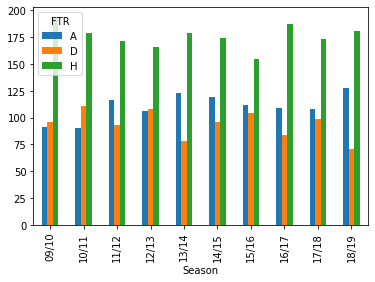

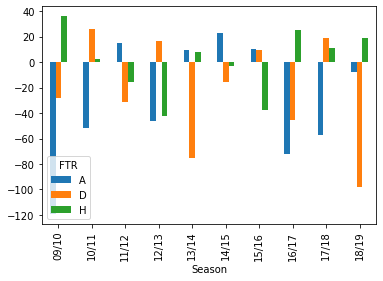

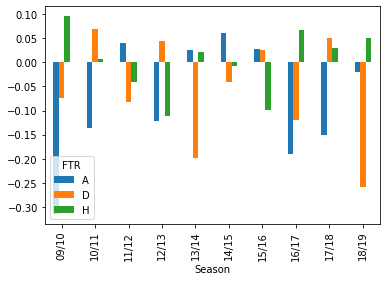

In [434]:
BetsPlot = pd.DataFrame(Season_group, columns=['BetW', 'BetR'])
BetsPlot['NetNomR'] = BetsPlot.BetR - 380
BetsPlot['Return_pct'] = (BetsPlot.BetR / 380 -1)

BetsBetW = BetsPlot.unstack().loc['09/10':'18/19', 'BetW']
BetsNetNomR = BetsPlot.unstack().loc['09/10':'18/19', 'NetNomR']
BetsReturn_pct = BetsPlot.unstack().loc['09/10':'18/19', 'Return_pct']



BetsBetW.plot.bar()
BetsNetNomR.plot.bar()
BetsReturn_pct.plot.bar()


# Conclusion

ADD CONCISE CONLUSION.